In [10]:
import re
from collections import Counter

In [13]:
drexler_df = pd.read_csv('data/drexler_complete_lyrics.csv', sep=';')
drexler_df['words'] = drexler_df.lyrics.str.strip().str.split('[\W_]+')
drexler_df['words']

0      [El, perfume, de, la, sal, Del, cabo, Santa, M...
1      [Nos, delata, el, equipaje, Y, la, duda, al, c...
2      [Se, va, la, tarde, en, Zanja, Honda, La, play...
3      [Mabel, dejó, El, bolso, con, unas, amigas, Y,...
4      [Luna, del, Cabo, Boca, de, túnel, Lunar, plat...
5      [Ella, se, pinta, con, un, sylvapen, Dibujándo...
6      [Como, un, tatuaje, desteñido, Me, iré, borran...
7      [Mírenla, salir, sobre, la, marea, Nadie, que,...
8      [Tu, caricia, no, me, afecta, Yo, la, puedo, t...
9      [En, una, quinta, De, la, calle, Caiguá, En, u...
10     [Una, bolsa, de, leche, encallada, en, la, are...
11     [Poco, fue, lo, que, quedó, De, su, boca, carm...
12     [Erase, una, noche, común, era, en, una, mesa,...
13     [Fuente, de, luz, de, bengala, ventana, hacia,...
14     [Salgo, a, la, rambla, de, Malvin, A, respirar...
15     [No, cruzaré, Tu, lado, de, la, cama, Quiero, ...
16     [Tengo, un, pañuelo, negro, entre, las, manos,...
17     [Cuando, la, noche, pase

Create a list of all the lyrics tokenized

In [17]:
corpora = []
for a_sentence in drexler_df['words']:
    new_lower_sentence = []
    for a_word in a_sentence:
        new_lower_sentence.append(a_word.lower())
    corpora.extend(new_lower_sentence)

In [26]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish') + ['na']

Countword them

In [29]:
nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
filtered = [w for w in corpora if nonPunct.match(w) and w not in spanish_stopwords]
counts_drexler = Counter(filtered)
counts_drexler

Counter({'perfume': 14,
         'sal': 7,
         'cabo': 4,
         'santa': 6,
         'maría': 2,
         'recobrándome': 2,
         'piel': 34,
         'dándome': 3,
         'bienvenida': 3,
         'voy': 29,
         'saliendo': 2,
         'caminar': 4,
         'gestos': 3,
         'demorados': 2,
         'quiero': 45,
         'oírla': 2,
         'respirar': 8,
         'durmiéndome': 2,
         'regazo': 4,
         'viento': 34,
         'viene': 9,
         'abraza': 2,
         'acuerda': 2,
         'buscándome': 3,
         'cosquillas': 2,
         'besos': 10,
         'nunca': 23,
         'di': 2,
         'repite': 3,
         '2': 3,
         'veces': 11,
         'delata': 1,
         'equipaje': 3,
         'duda': 8,
         'prudencia': 2,
         'pueblerina': 1,
         'silencio': 14,
         'catalán': 1,
         'niebla': 2,
         'barcelona': 1,
         'cómo': 21,
         'púdico': 1,
         'tapiz': 1,
         'allá': 14,
     

In [30]:
counts_drexler.most_common(10)

[('mar', 108),
 ('tiempo', 82),
 ('noche', 67),
 ('luna', 63),
 ('corazón', 57),
 ('bailar', 53),
 ('va', 50),
 ('cada', 50),
 ('si', 50),
 ('dos', 49)]

Same with related lyrics

In [32]:
related_df = pd.read_csv('data/related_lyrics.csv', sep=';')
related_df['words'] = related_df.lyrics.str.strip().str.split('[\W_]+')


In [33]:
corpora_related = []
for a_sentence in related_df['words']:
    new_lower_sentence = []
    for a_word in a_sentence:
        new_lower_sentence.append(a_word.lower())
    corpora_related.extend(new_lower_sentence)
nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
filtered = [w for w in corpora_related if nonPunct.match(w) and w not in spanish_stopwords]
counts_related = Counter(filtered)
counts_related.most_common(10)

[('si', 2758),
 ('amor', 2431),
 ('referent', 1911),
 ('quiero', 1380),
 ('fragment', 1365),
 ('id', 1365),
 ('preview', 1365),
 ('vida', 1261),
 ('vez', 1122),
 ('siempre', 1066)]

Create a strict intersection. If the word is present in Drexler corpora AND NOT in related, then keep it

In [40]:
words_intersected = {}
for element in counts_drexler:
    if element not in counts_related:
        words_intersected[element] = counts_drexler[element]

In [44]:
strict_intersection = Counter(words_intersected).most_common()

Threshold it. Keep actual words and not the ones which appear only once

In [50]:
strict_intersection[:4] #not actual words

[('tátara', 24), ('shh', 24), ('lalala', 12), ('gégé', 11)]

In [52]:
strict_intersection = strict_intersection[4:]

In [63]:
thresholded_intersection = []
for element in strict_intersection:
    if element[1] > 1:
        thresholded_intersection.append(element)

In [64]:
thresholded_intersection

[('rasquí', 11),
 ('caldera', 10),
 ('desenlace', 9),
 ('tamborero', 8),
 ('uruguay', 7),
 ('aparecida', 6),
 ('mabel', 6),
 ('voladora', 6),
 ('cuales', 6),
 ('inmersión', 6),
 ('guías', 6),
 ('guío', 6),
 ('electrones', 6),
 ('judío', 5),
 ('remo', 5),
 ('movió', 4),
 ('rememorar', 4),
 ('pretil', 4),
 ('montevideo', 4),
 ('cubierto', 4),
 ('juraría', 4),
 ('abremos', 4),
 ('rime', 4),
 ('buela', 4),
 ('shhhh', 4),
 ('protegían', 3),
 ('sonaban', 3),
 ('permitían', 3),
 ('salinas', 3),
 ('comentarios', 3),
 ('recostándose', 3),
 ('aprendía', 3),
 ('despertándose', 3),
 ('pestaña', 3),
 ('enterar', 3),
 ('desgrana', 3),
 ('moralejas', 3),
 ('rindo', 3),
 ('copiando', 3),
 ('muriéndome', 3),
 ('tecnicolor', 3),
 ('barcas', 3),
 ('computadoras', 3),
 ('tecnología', 3),
 ('silente', 3),
 ('abisal', 3),
 ('triángulo', 3),
 ('bermudas', 3),
 ('maracaná', 3),
 ('silen', 3),
 ('repetirte', 3),
 ('recobrándome', 2),
 ('demorados', 2),
 ('oírla', 2),
 ('durmiéndome', 2),
 ('minuciosa', 2),
 ('

In [75]:
from os import path
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
def plot_wordcloud_from_list(a_list):
    freqs_by_words = {}
    for a_topic_term in a_list:
        an_actual_word = a_topic_term[0]
        freqs_by_words[an_actual_word] = a_topic_term[1]
    # read the mask image
    trump_mask = np.array(Image.open("heart.jpg"))

    wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask, max_font_size=100,)
    # generate word cloud
    wc.generate_from_frequencies(freqs_by_words)

    #show
    plt.figure(figsize=(20,20))
    plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

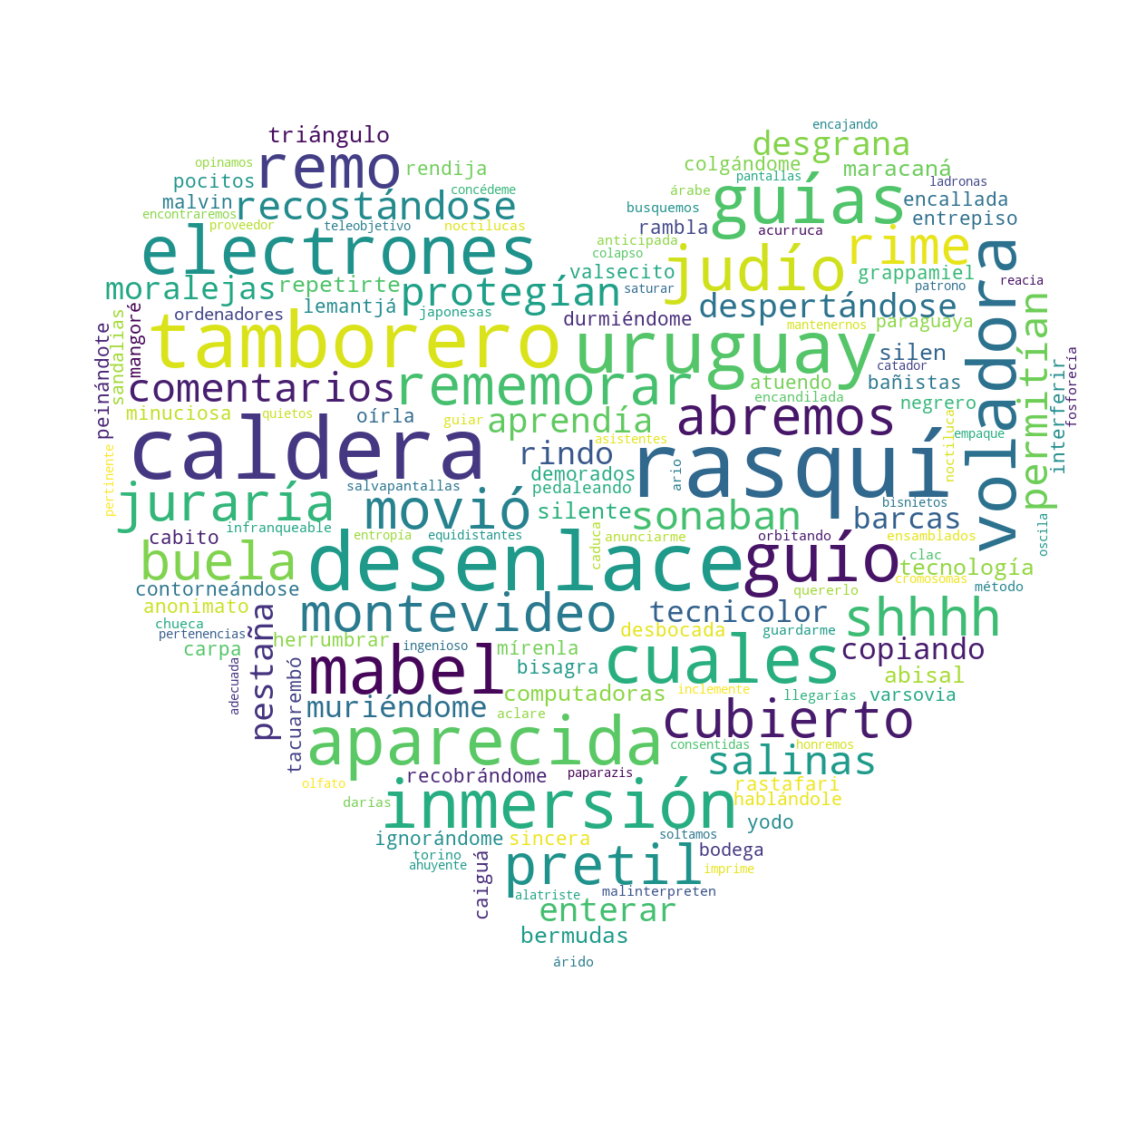

In [77]:
plot_wordcloud_from_list(thresholded_intersection)

In [79]:
intersection = counts_drexler & counts_related

In [80]:
intersection.most_common()

[('mar', 108),
 ('tiempo', 82),
 ('noche', 67),
 ('luna', 63),
 ('corazón', 57),
 ('bailar', 53),
 ('va', 50),
 ('cada', 50),
 ('si', 50),
 ('dos', 49),
 ('amor', 48),
 ('quiero', 45),
 ('aquí', 44),
 ('luz', 41),
 ('solo', 41),
 ('vida', 40),
 ('canción', 37),
 ('piel', 34),
 ('viento', 34),
 ('cielo', 34),
 ('vez', 31),
 ('bien', 31),
 ('tan', 30),
 ('sólo', 30),
 ('voy', 29),
 ('blanco', 29),
 ('aquel', 28),
 ('puedo', 28),
 ('uh', 28),
 ('data', 28),
 ('camino', 27),
 ('sé', 26),
 ('río', 25),
 ('vuelve', 24),
 ('mano', 24),
 ('arena', 24),
 ('ser', 24),
 ('cerca', 24),
 ('mundo', 24),
 ('llueve', 24),
 ('nunca', 23),
 ('día', 23),
 ('así', 22),
 ('cómo', 21),
 ('verte', 21),
 ('música', 21),
 ('negro', 21),
 ('ver', 21),
 ('pena', 21),
 ('aunque', 21),
 ('hacia', 20),
 ('aire', 20),
 ('lejos', 20),
 ('haces', 20),
 ('menos', 19),
 ('paso', 19),
 ('dame', 19),
 ('agua', 19),
 ('sur', 18),
 ('da', 18),
 ('pasar', 18),
 ('cruzando', 18),
 ('horas', 18),
 ('siempre', 18),
 ('vi', 17),

In [88]:
def threshold_and_plot_wordcloud_from_list(a_list, a_range):
    
    a_min = a_range[0]
    a_max = a_range[1]
    
    thresholded_intersection = []
    for element in a_list:
        if element[1] >= a_min and element[1] < a_max:
            thresholded_intersection.append(element)

    freqs_by_words = {}
    for a_topic_term in thresholded_intersection:
        an_actual_word = a_topic_term[0]
        freqs_by_words[an_actual_word] = a_topic_term[1]
    # read the mask image
    trump_mask = np.array(Image.open("heart.jpg"))

    wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask, max_font_size=100,)
    # generate word cloud
    wc.generate_from_frequencies(freqs_by_words)

    #show
    plt.figure(figsize=(20,20))
    plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

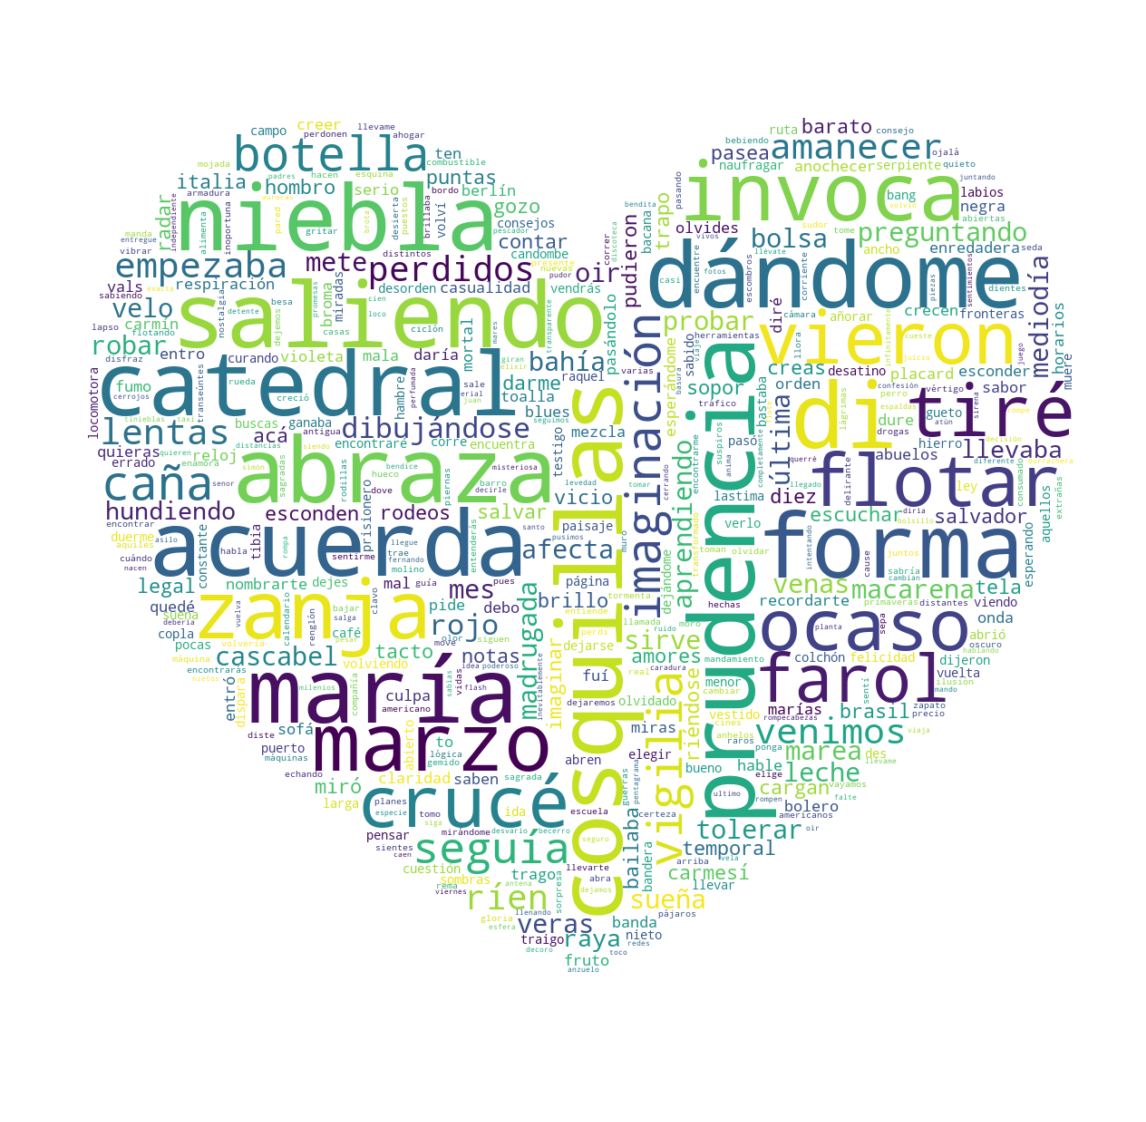

In [95]:
threshold_and_plot_wordcloud_from_list(intersection.most_common(), (2,3))